In [81]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from einops import rearrange, reduce, repeat

In [3]:
torch.manual_seed(123)

In [4]:
t1 = torch.rand(120)
## q1. done

In [5]:
t2 = t1.reshape(5, 2, 4, 3)
print(t2.shape) 


t2einops = rearrange(t1, "(b c h w) -> b c h w", b = 5, c =2 , h=4)
print(t2einops.shape)

(t2 == t2einops).all()
## q2. done

torch.Size([5, 2, 4, 3])
torch.Size([5, 2, 4, 3])


tensor(True)

In [6]:
def stats_n(t, stats=torch.mean,dims=(2,3)):
    return stats(t, dim= dims)

def stats_e(t, stats='mean', dims = 'b c h w-> b c'):
    return reduce(t, dims, stats)

# t3 = t2.mean(dim=(0,1,2))
# t3einops = reduce(t2, 'b c h w -> w', 'mean')

print(stats_n(t2), stats_e(t2))
print(stats_n(t2, torch.std), stats_e(t2, torch.std))
print(stats_n(t2, torch.var), stats_e(t2, torch.var))

## q3. done

tensor([[0.4038, 0.5038],
        [0.6204, 0.4299],
        [0.5468, 0.4853],
        [0.4835, 0.5426],
        [0.5933, 0.5664]]) tensor([[0.4038, 0.5038],
        [0.6204, 0.4299],
        [0.5468, 0.4853],
        [0.4835, 0.5426],
        [0.5933, 0.5664]])
tensor([[0.2787, 0.3004],
        [0.2950, 0.2309],
        [0.3050, 0.3228],
        [0.2696, 0.2940],
        [0.3070, 0.2413]]) tensor([[0.2787, 0.3004],
        [0.2950, 0.2309],
        [0.3050, 0.3228],
        [0.2696, 0.2940],
        [0.3070, 0.2413]])
tensor([[0.0776, 0.0903],
        [0.0870, 0.0533],
        [0.0930, 0.1042],
        [0.0727, 0.0865],
        [0.0943, 0.0582]]) tensor([[0.0776, 0.0903],
        [0.0870, 0.0533],
        [0.0930, 0.1042],
        [0.0727, 0.0865],
        [0.0943, 0.0582]])


In [208]:
print(stats_n(t2, dims=(3)), stats_e(t2, dims='b c h w-> b c h'))
print(stats_n(t2, torch.std,dims=(3)), stats_e(t2, torch.std, dims='b c h w -> b c h'))
print(stats_n(t2, torch.var, dims=(3)), stats_e(t2, torch.var, dims='b c h w -> b c h'))

##q4 .done

tensor([[[0.3548, 0.5430, 0.1410, 0.5763],
         [0.1962, 0.4492, 0.6320, 0.7375]],

        [[0.4035, 0.5986, 0.7945, 0.6852],
         [0.1938, 0.3905, 0.6296, 0.5055]],

        [[0.8096, 0.6399, 0.2205, 0.5172],
         [0.5065, 0.3281, 0.2803, 0.8262]],

        [[0.3168, 0.4092, 0.6849, 0.5231],
         [0.2439, 0.7884, 0.5531, 0.5851]],

        [[0.9085, 0.4614, 0.3817, 0.6215],
         [0.7001, 0.4850, 0.3628, 0.7178]]]) tensor([[[0.3548, 0.5430, 0.1410, 0.5763],
         [0.1962, 0.4492, 0.6320, 0.7375]],

        [[0.4035, 0.5986, 0.7945, 0.6852],
         [0.1938, 0.3905, 0.6296, 0.5055]],

        [[0.8096, 0.6399, 0.2205, 0.5172],
         [0.5065, 0.3281, 0.2803, 0.8262]],

        [[0.3168, 0.4092, 0.6849, 0.5231],
         [0.2439, 0.7884, 0.5531, 0.5851]],

        [[0.9085, 0.4614, 0.3817, 0.6215],
         [0.7001, 0.4850, 0.3628, 0.7178]]])
tensor([[[0.1419, 0.4158, 0.0410, 0.2269],
         [0.1204, 0.3568, 0.2370, 0.2134]],

        [[0.2208, 0.4850, 0.1151

In [ ]:
t5 = t1.reshape(15, 8).clone().detach().numpy()

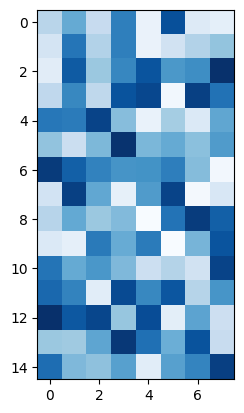

In [ ]:
plt.imshow(t5, 'Blues')
##q5 .done

In [70]:
torch.manual_seed(123)
t6 = torch.ones(10, 10)

In [74]:
onerow = torch.ones(10).unsqueeze(dim=0)
onerow[0, 1::2] = 0

In [76]:
tworow = 1- onerow.clone()

In [100]:
out6 = rearrange(repeat(torch.vstack((onerow, tworow)), 'h c -> 5 h c '), 'c h w -> (c h) w')

In [101]:
# t6[0, 1::2] = 0
# t6[1, ::2] = 0
np_out6 = out6.clone().detach().numpy()

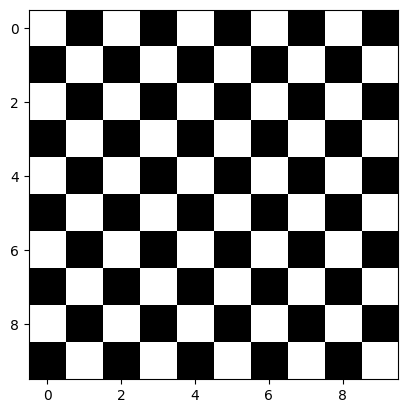

In [ ]:

#6. done and #7. done
plt.imshow(np_out6, 'gray')

In [ ]:
## for question 8
t7 = torch.tensor(np_out6)

In [190]:
t7_3c = repeat(t7, 'h c -> 3 h c') ## Not correct
t7_3c = t7.repeat((3,1,1))

In [ ]:
t7_3c.shape
plt.imshow(np_out6, 'gray')
##q.7 done

torch.Size([3, 10, 10])

In [ ]:
r, g, b = 0.25, 0.95 , .95
t7_3c[0] = r*t7_3c[0]
t7_3c[1] = g*t7_3c[1]
t7_3c[2] = b*t7_3c[2]
## Just to be explicit and hyper parameters can be tweaked to get any color

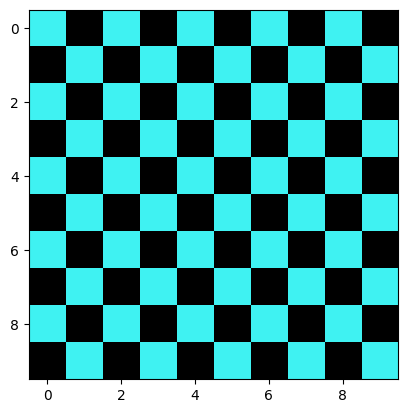

In [ ]:
np_t7 = t7_3c.permute(1,2,0).clone().detach().numpy()
plt.imshow(np_t7)
##8. done

In [203]:
t8 = t1.reshape(15, 8).clone().detach()

In [204]:
t8[:, ::2] = 0

In [206]:
t8_np = t8.clone().detach().numpy()

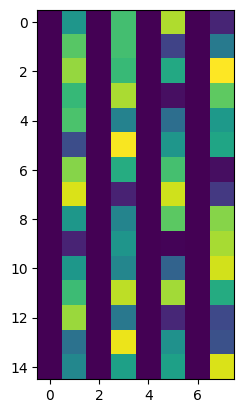

In [ ]:
plt.imshow(t8_np)
## q9. done

In [ ]:
## I left the theroy part as is and leaving the bonus questions as well, rest all 9 are done